[*********************100%***********************]  1 of 1 completed


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Display the raw stock data
print("Raw Data (First 10 Rows):")
print(stock_data.head(10))  # Display first 10 rows of data


[*********************100%***********************]  1 of 1 completed

Raw Data (First 10 Rows):
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876122  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400528  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200
2020-01-09  76.809998  77.607498  76.550003  77.407501  75.127769  170108400
2020-01-10  77.650002  78.167503  77.062500  77.582497  75.297623  140644800
2020-01-13  77.910004  79.267502  77.787498  79.239998  76.906303  121532000
2020-01-14  79.175003  79.392502  78.042503  78.169998  75.867813  161954400
2020-01-15  77.962502  78.875000  77.387497  77.834999  75.542686  121923600


In [10]:
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
stock_data['Log_Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
stock_data['50_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Adj Close'].rolling(window=200).mean()
stock_data['Volatility'] = stock_data['Log_Return'].rolling(window=30).std() * np.sqrt(252)
print("\nData with Calculated Columns:")
print(stock_data.head(10))  


Data with Calculated Columns:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876122  135480400   
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400528  108872000   
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200   
2020-01-09  76.809998  77.607498  76.550003  77.407501  75.127769  170108400   
2020-01-10  77.650002  78.167503  77.062500  77.582497  75.297623  140644800   
2020-01-13  77.910004  79.267502  77.787498  79.239998  76.906303  121532000   
2020-01-14  79.175003  79.392502  78.042503  78.169998  75.867813  161954400   
2020-01-15  77.962502  78.875000  77.387497  77.834999  75.542686  121923600   

        

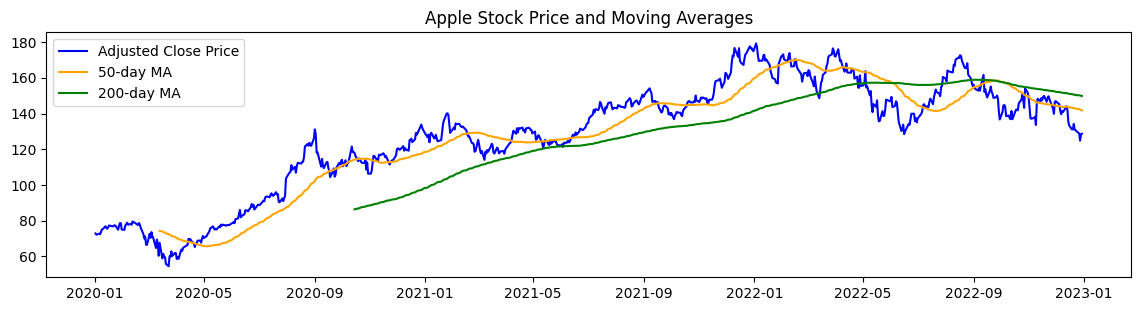

In [11]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(stock_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(stock_data['50_MA'], label='50-day MA', color='orange')
plt.plot(stock_data['200_MA'], label='200-day MA', color='green')
plt.title('Apple Stock Price and Moving Averages')
plt.legend()

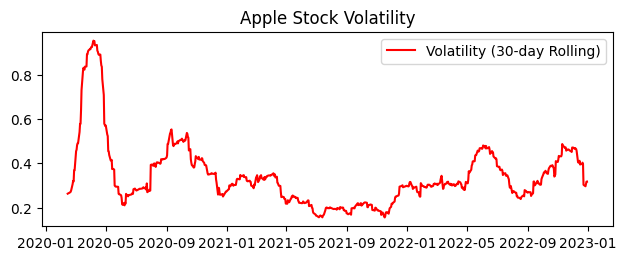

In [12]:
plt.subplot(2, 1, 2)
plt.plot(stock_data['Volatility'], label='Volatility (30-day Rolling)', color='red')
plt.title('Apple Stock Volatility')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
correlation = stock_data['Daily_Return'].corr(stock_data['Volatility'])
print(f"\nCorrelation between Daily Returns and Volatility: {correlation:.2f}")


Correlation between Daily Returns and Volatility: 0.01
